# First, rename your lab so that it includes your name

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In mechanics (especially), we want to solve differential equations of the form:
$$ \frac{d \vec{\mathbf{x}}}{dt} = \vec{\mathbf{F}} (\vec{\mathbf{x}}) $$
In the previous lab we solved two differential equations:
$$ \frac{d}{dt} \left( \begin{array}{c} x \\ y \\ v_x \\ v_y \end{array} \right) = \left( \begin{array}{c} v_x \\ v_y \\ 0 \\ - 9.8 \end{array} \right) \qquad {\rm and} \qquad \frac{d}{dt} \left( \begin{array}{c} x \\ y \\ v_x \\ v_y \end{array} \right) = \left( \begin{array}{c} v_x \\ v_y \\ - b v_x \\ - 9.8 -  b v_y \end{array} \right) $$

With this in mind, we can create a function to represent the derivatives (the right-hand-side of the differential equations).  For example, the first one (projectile motion) can be written as a function:

In [2]:
def F1(x_in):
    x, y, vx, vy = x_in
    
    derivative = np.zeros(4)
    derivative[:] = [vx, vy, 0, -9.8]
    return derivative

In the last lab, we introduced the **Second Order Runge-Kutta Method** as a way of getting more bang for our computing buck.  A second order Runge-Kutta method (called Heun's method) is:

$$ k1_x = v_x \, \Delta t \qquad k1_y = v_y \, \Delta t$$
$$ k1_{vx} = a_x \, \Delta t \qquad k1_{vy} = a_y \, \Delta t$$

$$ k2_x = (v_x + k1_{vx}) \, \Delta t \qquad k2_y = (v_y + k1_{vy}) \, \Delta t$$
$$ k2_{vx} = a_x \, \Delta t \qquad k2_{vy} = a_y \, \Delta t$$

$$ x_f = x + 0.5 (k1_x + k2_x) \qquad y_f = y + 0.5 (k1_y + k2_y)$$
$$ v_{xf} = v_x + 0.5 (k1_{vx} + k2_{vx}) \qquad v_{yf} = v_y + 0.5 (k1_{vy} + k2_{vy})$$

Here, we're using $a_x = 0$ and $a_y = - 9.8$.  

This is a mess, we can actually simplify this with arrays:
$$\vec{\mathbf{k}}_1 = \vec{\mathbf{F}} (\vec{\mathbf{x}}) \, \Delta t$$
$$\vec{\mathbf{k}}_2 = \vec{\mathbf{F}} (\vec{\mathbf{x}} + \vec{\mathbf{k}}_1) \, \Delta t$$

$$\vec{\mathbf{x}}_f = \vec{\mathbf{x}} + \tfrac{1}{2} ( \vec{\mathbf{k}}_1 + \vec{\mathbf{k}}_2 )$$

In [3]:
def time_step1(x_in, dt):
    k1 = F1(x_in) * dt
    k2 = F1(x_in + k1) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

Now we can solve the differential equations as we did before (with initial condition $x = 0,~y = 0,~v_x = 30,~v_y = 40$).

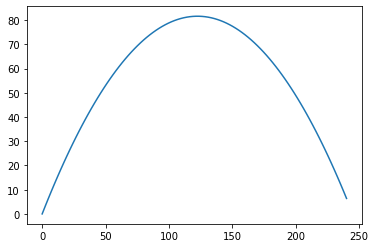

In [4]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = time_step1(x_array, dt)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(x_step, y_step)
plt.show()

This is nice, but it seems doomed to error if we want to change our functions.  It would be useful if we could create a time step function that can change when we change our derivative function (to, for example, deal with different forces in this kinematics example).

Fortunately, we can create a function that has a function as an input.  The function below, ``time_step()`` takes three inputs, the third is the name of the function.

In [5]:
def time_step(x_in, dt, F):
    k1 = F(x_in) * dt
    k2 = F(x_in + k1) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

Use this ``time_step()`` function to solve the differential equation.  The relevant place you should change things is ``time_step(x_array, dt, F1)``.

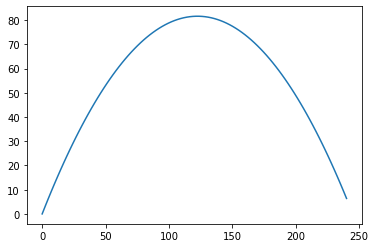

In [6]:
time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = time_step(x_array, dt, F1)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(x_step, y_step)
plt.show()

We can now solve the problem with air resistance (the differential equation above, on the right using $b = 0.1$).  All we need to solve that problem is to create a new function (like ``F1()``).  Create a new function (please don't call it F1) that represents the derivatives, and use that function along with ``time_step()`` to solve the differential equation.

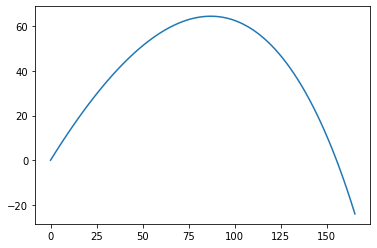

In [7]:
def air_resistance(x_in):
    x, y, vx, vy = x_in
    
    derivative_air = np.zeros(4)
    derivative_air[:] = [vx, vy, -b*vx, -9.8-b*vy]
    return derivative_air

time = np.linspace(0,8,100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40
b = 0.1


x_array = np.zeros(4)
x_array[:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1,len(time)):
    x_array = time_step(x_array, dt, air_resistance)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(x_step, y_step)
plt.show()

But if we want to choose a different value for $b$, with this method we need to completely re-run everything.  We should be able to use functions to alleviate this issue.

Create a new function that now takes $b$ as an input (rather than setting ``b=0.1`` -- this should not be a part of this new function).  Complete the following:

In [8]:
def G(x_in, b):
    x, y , vx, vy = x_in
    
    derivative = np.zeros(4)
    derivative [:] = [vx, vy, -b*vx, -9.8-b*vy]
    return derivative

Now we need to create a time step function that uses $b$ as an input.  Complete the following:

𝐤⃗ 1=𝐅⃗ (𝐱⃗ )Δ𝑡
 
𝐤⃗ 2=𝐅⃗ (𝐱⃗ +𝐤⃗ 1)Δ𝑡
 
𝐱⃗ 𝑓=𝐱⃗ +12(𝐤⃗ 1+𝐤⃗ 2)

In [9]:
def time_step_b(x_in, dt, F, b):
    k1 = F(x_in, b) * dt
    k2 = F(x_in + k1, b) * dt
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

Let's now solve this problem by **first** defining the value of $b$ in code, then making sure to use ``time_step_b`` to solve the differential equation:

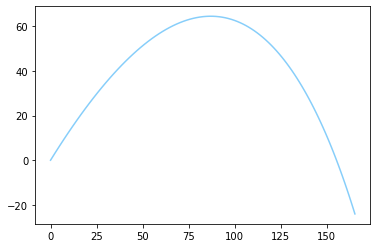

In [10]:
b = 0.1
time = np.linspace(0, 8, 100)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

x = 0
y = 0
vx = 30
vy = 40

x_array = np.zeros(4)
x_array [:] = [x, y, vx, vy]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1, len(time)):
    x_array = time_step_b(x_array, dt, G, b)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(x_step, y_step, color = "lightskyblue")
plt.show()

Finally, because $b$ is a parameter that we might want to see the results of varying it, let's create a function.  The function has ``b`` as an input, and the function will solve the differential equation and create a plot of the motion.  (Make sure your function doesn't still have ``b=0.1`` in it...)

In [11]:
def motion(b):
    time = np.linspace(0, 8, 100)
    dt = time[1] - time[0]
    x_step = np.zeros(len(time))
    y_step = np.zeros(len(time))

    x = 0
    y = 0
    vx = 30
    vy = 40

    x_array = np.zeros(4)
    x_array [:] = [x, y, vx, vy]

    x_step[0] = x_array[0]
    y_step[0] = x_array[1]

    for i in range(1, len(time)):
        x_array = time_step_b(x_array, dt, G, b)
        x_step[i] = x_array[0]
        y_step[i] = x_array[1]
        
    plt.figure()
    plt.plot(x_step, y_step, color = "lightskyblue")
    plt.show()

Try it out for a variety of values of $b$.

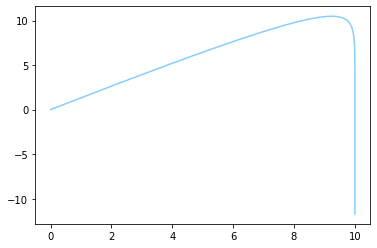

In [12]:
motion(3)

The problem is that ``plt.plot()`` automatically scales to the arrays it is plotting and it's hard to compare.  The maximum for the no-air-resistance case is just greater than 80 m, so if we keep a fixed y-axis scale, then we can see the affects of increasing air resistance.  Include the command ``plt.ylim(0,85)`` to make sure that we keep a fixed y-axis scale.  Then, try again for different values of $b$.

In [13]:
def motion(b):
    time = np.linspace(0, 8, 100)
    dt = time[1] - time[0]
    x_step = np.zeros(len(time))
    y_step = np.zeros(len(time))

    x = 0
    y = 0
    vx = 30
    vy = 40

    x_array = np.zeros(4)
    x_array [:] = [x, y, vx, vy]

    x_step[0] = x_array[0]
    y_step[0] = x_array[1]

    for i in range(1, len(time)):
        x_array = time_step_b(x_array, dt, G, b)
        x_step[i] = x_array[0]
        y_step[i] = x_array[1]
        
    plt.figure()
    plt.plot(x_step, y_step, color = "lightskyblue")
    plt.ylim(0,85)
    plt.show()

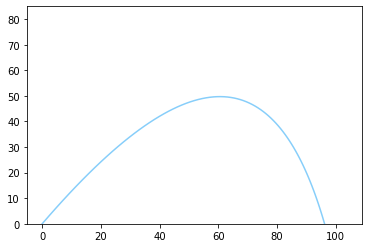

In [14]:
motion(0.25)

Finally, we can make a slider.  Make a slider to see the effects of varying $b$. (Hint:  ``widgets.interact(__, b=(__,__,__)``)

In [15]:
widgets.interact(motion, b=(0,5,0.1))

interactive(children=(FloatSlider(value=2.0, description='b', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.motion(b)>